In [1]:
import importlib
import numpy as np
from matplotlib import pyplot as plt
import libs.MEVeS as S
importlib.reload(S)
import libs.AtomicConstants.Atom as A
importlib.reload(A)
import libs.Optimiser as Opt
importlib.reload(Opt)
import timeit

# Memory simulation

In [2]:
# Make atom class

config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

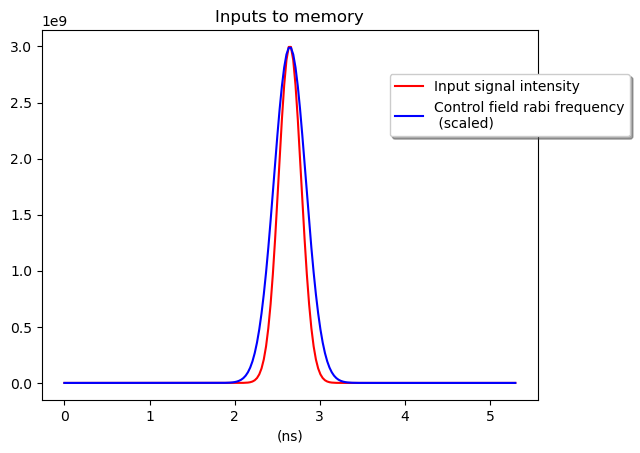

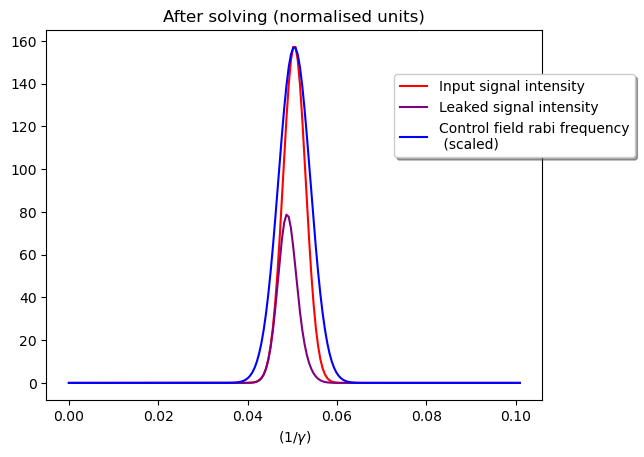

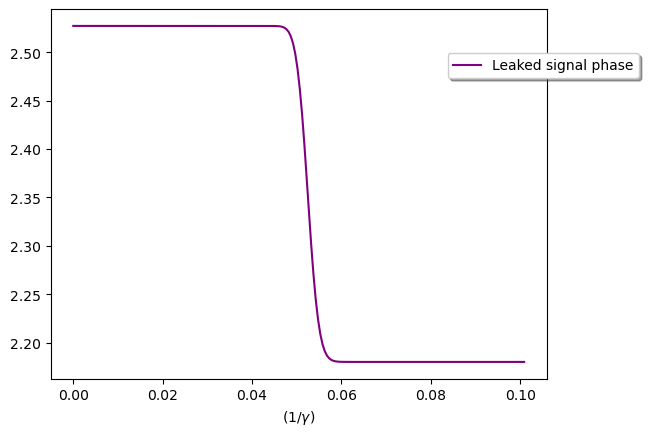

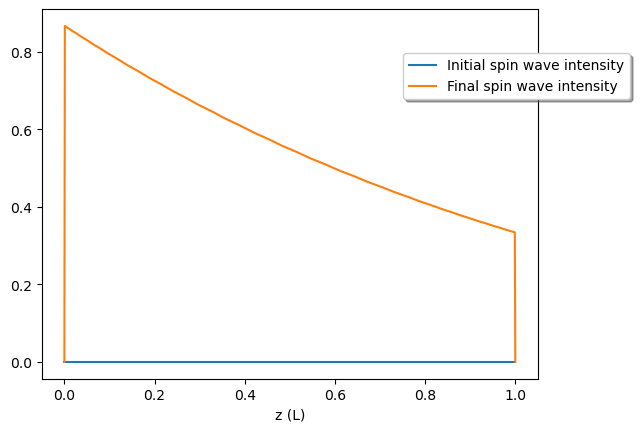

Storage Efficiency = 0.5656219394201958


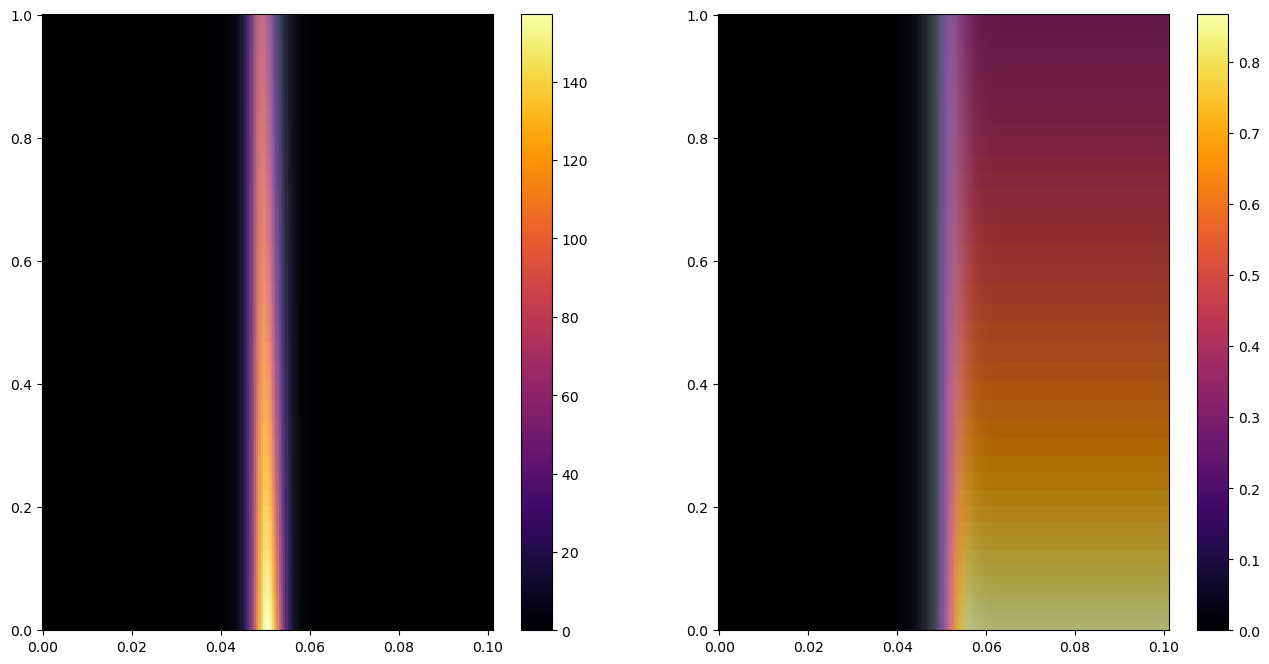

In [3]:
protocol = 'Raman'

OD = 5000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning 
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 200
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.zeros((n, 1, 1, 1, 1, vno))

Omega = 2*np.pi*1e9
control_pol = np.array([1, 0])
Control_tp = (S.gaussian(t, t0, tau, Omega))[:, None] * control_pol[None, :]

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_tzp = sol.co_prop( Control_tp )

plt.plot(t*1e9, pow(Einits[:, 0], 2), color='red', label='Input signal intensity')
plt.plot(t*1e9, (pow(max(Einits[:, 0]), 2)/Omega) * Control_tp[:, 0], color='blue', label='Control field rabi frequency\n (scaled)')
plt.title('Inputs to memory')
plt.xlabel('(ns)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

sol.solve(Control_tzp, method='RK4-Ralston')

plt.plot(sol.tpoints, pow(np.abs(sol.E[:, 0, 0]),2), color='red', label='Input signal intensity')
plt.plot(sol.tpoints, pow(np.abs(sol.E[:, -1, 0]),2), color='purple', label='Leaked signal intensity')
plt.plot(sol.tpoints, (pow(max(np.abs(sol.E[:, 0, 0])), 2)/Omega)*Control_tp[:, 0], color='blue', label='Control field rabi frequency\n (scaled)')
plt.title('After solving (normalised units)')
plt.xlabel('(1/$\gamma$)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

#plt.plot(sol.tpoints, np.angle(sol.E[:, 0, 0]), color='red', label='Input signal phase')
plt.plot(sol.tpoints, np.angle(sol.E[:, -1, 0]), color='purple', label='Leaked signal phase')
#plt.title('After solving (normalised units)')
plt.xlabel('(1/$\gamma$)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

plt.plot(sol.zCheby, pow(np.abs(sol.S[0, :, 0, 0, 0, 0, 0]), 2), label='Initial spin wave intensity')
plt.plot(sol.zCheby, pow(np.abs(sol.S[-1, :, 0, 0, 0, 0, 0]), 2), label='Final spin wave intensity')
plt.xlabel('z (L)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

eff = sol.storage_efficiency(sol.S, -1)

print("Storage Efficiency = " + str(eff))

# 2d plots of coherences

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
colour = plt.get_cmap("inferno")

im = ax[0].pcolormesh(sol.tpoints, sol.zCheby, pow(np.abs(sol.E[:, :, 0]),2).T, cmap=colour)

fig.colorbar(im, ax=ax[0])

ax[0].pcolormesh(sol.tpoints, sol.zCheby, np.abs(Control_tzp(sol.t_grid, sol.z_grid)[:, :, 0]), cmap='bone', alpha=0.3)

im = ax[1].pcolormesh(sol.tpoints, sol.zCheby, pow(np.abs(sol.S[:, :, 0, 0, 0, 0, 0]),2).T, cmap=colour)

fig.colorbar(im, ax=ax[1])

ax[1].pcolormesh(sol.tpoints, sol.zCheby, np.abs(Control_tzp(sol.t_grid, sol.z_grid)[:, :, 0]), cmap='bone', alpha=0.3)

plt.show()

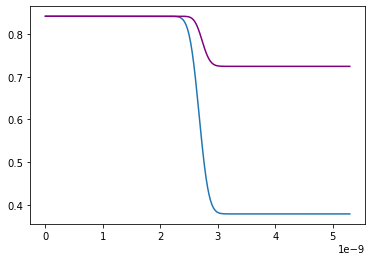

In [9]:
stark = [] 

for mi in range(m):
    stark.append(-np.trapz(pow(Control_tp[:mi, 0]/sol.gamma, 2), x=t[:mi]*sol.gamma)/(detuning/sol.gamma))

plt.plot(t, np.array(stark)+np.angle(sol.E[0, -1, 0]))
plt.plot(t, np.angle(sol.E[:, -1, 0]), color='purple')
plt.show()

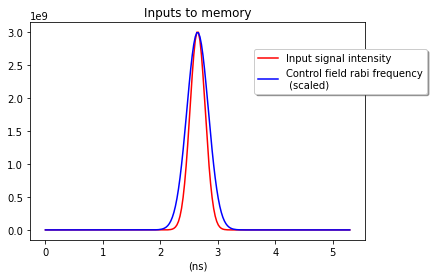

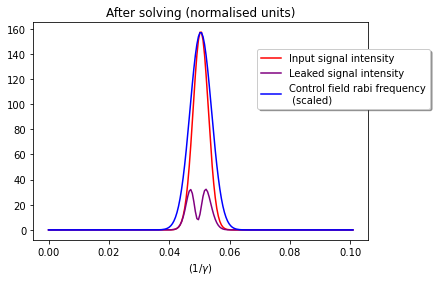

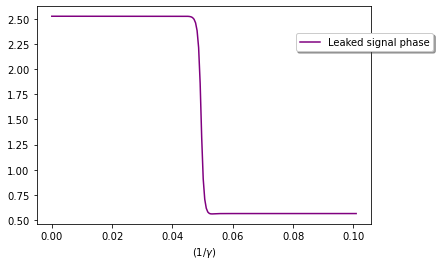

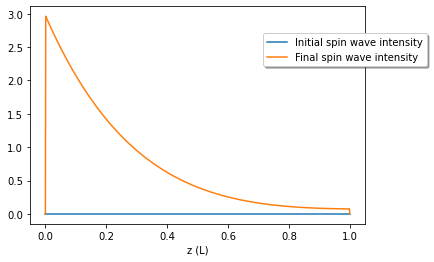

Storage Efficiency = 0.7503605947733637


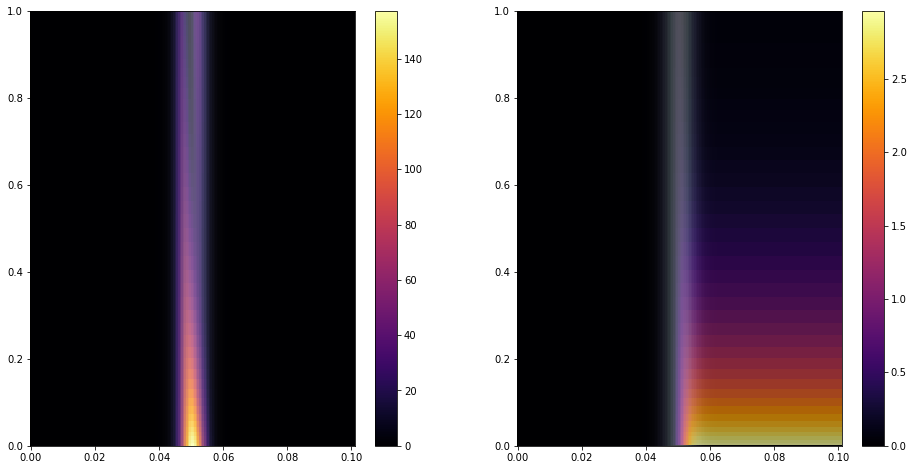

In [10]:
protocol = 'Raman'

OD = 5000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning 
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 200
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.zeros((n, 1, 1, 1, 1, vno))

Omega = 2*np.pi*2e9
control_pol = np.array([1, 0])
Control_tp = (S.gaussian(t, t0, tau, Omega))[:, None] * control_pol[None, :]

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_tzp = sol.co_prop( Control_tp )

plt.plot(t*1e9, pow(Einits[:, 0], 2), color='red', label='Input signal intensity')
plt.plot(t*1e9, (pow(max(Einits[:, 0]), 2)/Omega) * Control_tp[:, 0], color='blue', label='Control field rabi frequency\n (scaled)')
plt.title('Inputs to memory')
plt.xlabel('(ns)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

sol.solve(Control_tzp, method='RK4-Ralston')

plt.plot(sol.tpoints, pow(np.abs(sol.E[:, 0, 0]),2), color='red', label='Input signal intensity')
plt.plot(sol.tpoints, pow(np.abs(sol.E[:, -1, 0]),2), color='purple', label='Leaked signal intensity')
plt.plot(sol.tpoints, (pow(max(np.abs(sol.E[:, 0, 0])), 2)/Omega)*Control_tp[:, 0], color='blue', label='Control field rabi frequency\n (scaled)')
plt.title('After solving (normalised units)')
plt.xlabel('(1/$\gamma$)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

#plt.plot(sol.tpoints, np.angle(sol.E[:, 0, 0]), color='red', label='Input signal phase')
plt.plot(sol.tpoints, np.angle(sol.E[:, -1, 0]), color='purple', label='Leaked signal phase')
#plt.title('After solving (normalised units)')
plt.xlabel('(1/$\gamma$)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

plt.plot(sol.zCheby, pow(np.abs(sol.S[0, :, 0, 0, 0, 0, 0]), 2), label='Initial spin wave intensity')
plt.plot(sol.zCheby, pow(np.abs(sol.S[-1, :, 0, 0, 0, 0, 0]), 2), label='Final spin wave intensity')
plt.xlabel('z (L)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

eff = sol.storage_efficiency(sol.S, -1)

print("Storage Efficiency = " + str(eff))

# 2d plots of coherences

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
colour = plt.get_cmap("inferno")

im = ax[0].pcolormesh(sol.tpoints, sol.zCheby, pow(np.abs(sol.E[:, :, 0]),2).T, cmap=colour)

fig.colorbar(im, ax=ax[0])

ax[0].pcolormesh(sol.tpoints, sol.zCheby, np.abs(Control_tzp(sol.t_grid, sol.z_grid)[:, :, 0]), cmap='bone', alpha=0.3)

im = ax[1].pcolormesh(sol.tpoints, sol.zCheby, pow(np.abs(sol.S[:, :, 0, 0, 0, 0, 0]),2).T, cmap=colour)

fig.colorbar(im, ax=ax[1])

ax[1].pcolormesh(sol.tpoints, sol.zCheby, np.abs(Control_tzp(sol.t_grid, sol.z_grid)[:, :, 0]), cmap='bone', alpha=0.3)

plt.show()

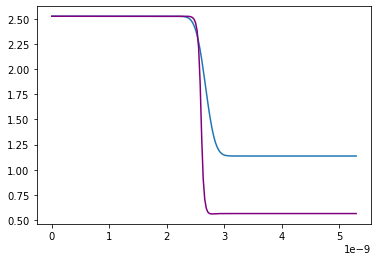

In [11]:
stark = [] 

for mi in range(m):
    stark.append(-np.trapz(pow(Control_tp[:mi, 0]/sol.gamma, 2), x=t[:mi]*sol.gamma)/(detuning/sol.gamma))

plt.plot(t, np.array(stark)+np.angle(sol.E[0, -1, 0]))
plt.plot(t, np.angle(sol.E[:, -1, 0]), color='purple')
plt.show()

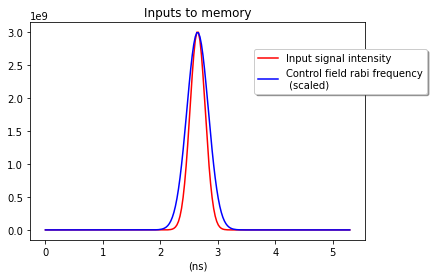

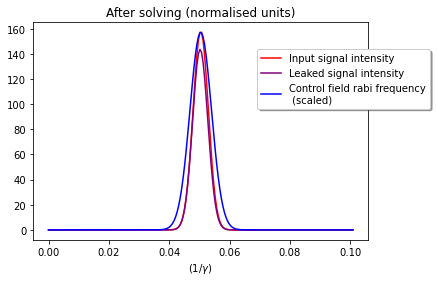

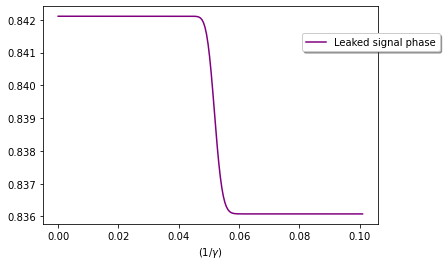

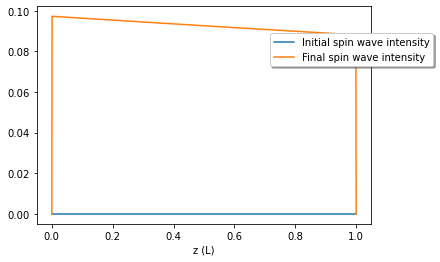

Storage Efficiency = 0.09253226932646495


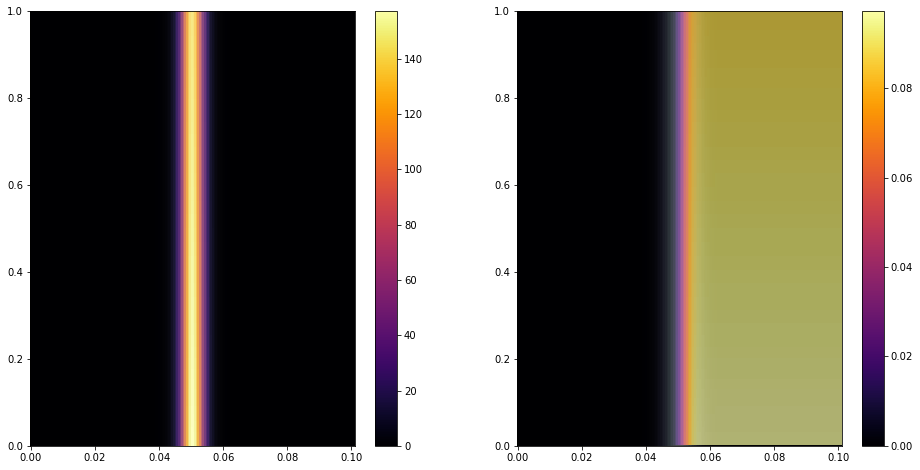

In [12]:
protocol = 'Raman'

OD = 5000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18e9

deltaS = detuning 
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 200
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.zeros((n, 1, 1, 1, 1, vno))

Omega = 2*np.pi*1e9
control_pol = np.array([1, 0])
Control_tp = (S.gaussian(t, t0, tau, Omega))[:, None] * control_pol[None, :]

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_tzp = sol.co_prop( Control_tp )

plt.plot(t*1e9, pow(Einits[:, 0], 2), color='red', label='Input signal intensity')
plt.plot(t*1e9, (pow(max(Einits[:, 0]), 2)/Omega) * Control_tp[:, 0], color='blue', label='Control field rabi frequency\n (scaled)')
plt.title('Inputs to memory')
plt.xlabel('(ns)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

sol.solve(Control_tzp, method='RK4-Ralston')

plt.plot(sol.tpoints, pow(np.abs(sol.E[:, 0, 0]),2), color='red', label='Input signal intensity')
plt.plot(sol.tpoints, pow(np.abs(sol.E[:, -1, 0]),2), color='purple', label='Leaked signal intensity')
plt.plot(sol.tpoints, (pow(max(np.abs(sol.E[:, 0, 0])), 2)/Omega)*Control_tp[:, 0], color='blue', label='Control field rabi frequency\n (scaled)')
plt.title('After solving (normalised units)')
plt.xlabel('(1/$\gamma$)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

#plt.plot(sol.tpoints, np.angle(sol.E[:, 0, 0]), color='red', label='Input signal phase')
plt.plot(sol.tpoints, np.angle(sol.E[:, -1, 0]), color='purple', label='Leaked signal phase')
#plt.title('After solving (normalised units)')
plt.xlabel('(1/$\gamma$)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

plt.plot(sol.zCheby, pow(np.abs(sol.S[0, :, 0, 0, 0, 0, 0]), 2), label='Initial spin wave intensity')
plt.plot(sol.zCheby, pow(np.abs(sol.S[-1, :, 0, 0, 0, 0, 0]), 2), label='Final spin wave intensity')
plt.xlabel('z (L)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

eff = sol.storage_efficiency(sol.S, -1)

print("Storage Efficiency = " + str(eff))

# 2d plots of coherences

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
colour = plt.get_cmap("inferno")

im = ax[0].pcolormesh(sol.tpoints, sol.zCheby, pow(np.abs(sol.E[:, :, 0]),2).T, cmap=colour)

fig.colorbar(im, ax=ax[0])

ax[0].pcolormesh(sol.tpoints, sol.zCheby, np.abs(Control_tzp(sol.t_grid, sol.z_grid)[:, :, 0]), cmap='bone', alpha=0.3)

im = ax[1].pcolormesh(sol.tpoints, sol.zCheby, pow(np.abs(sol.S[:, :, 0, 0, 0, 0, 0]),2).T, cmap=colour)

fig.colorbar(im, ax=ax[1])

ax[1].pcolormesh(sol.tpoints, sol.zCheby, np.abs(Control_tzp(sol.t_grid, sol.z_grid)[:, :, 0]), cmap='bone', alpha=0.3)

plt.show()

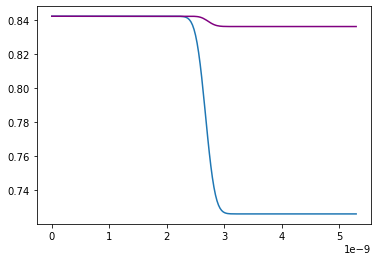

In [13]:
stark = [] 

for mi in range(m):
    stark.append(-np.trapz(pow(Control_tp[:mi, 0]/sol.gamma, 2), x=t[:mi]*sol.gamma)/(detuning/sol.gamma))

plt.plot(t, np.array(stark)+np.angle(sol.E[0, -1, 0]))
plt.plot(t, np.angle(sol.E[:, -1, 0]), color='purple')
plt.show()

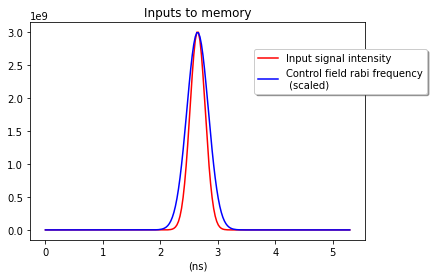

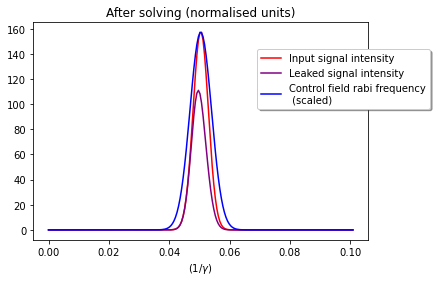

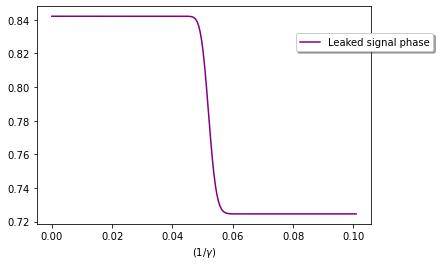

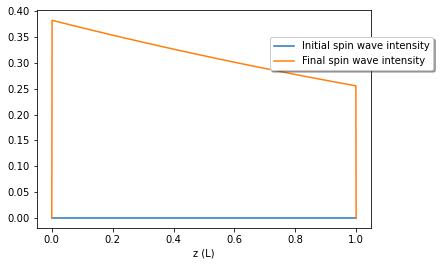

Storage Efficiency = 0.31513870771015523


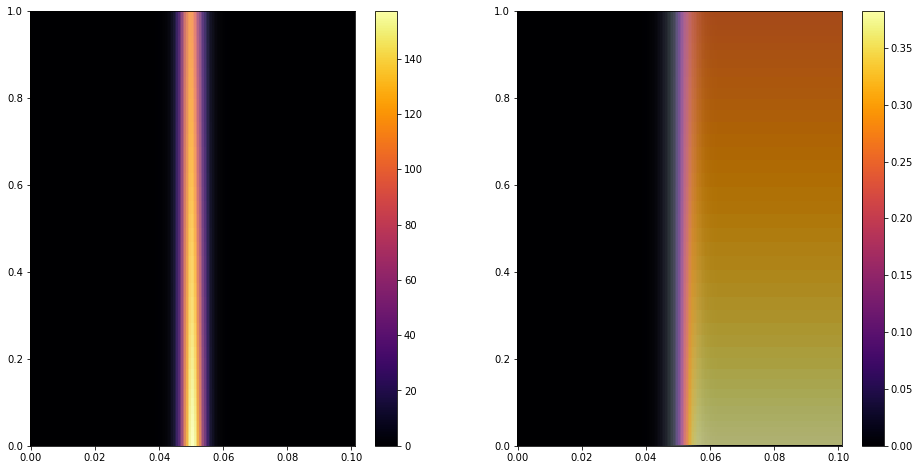

In [14]:
protocol = 'Raman'

OD = 5000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18e9

deltaS = detuning 
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 200
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.zeros((n, 1, 1, 1, 1, vno))

Omega = 2*np.pi*2e9
control_pol = np.array([1, 0])
Control_tp = (S.gaussian(t, t0, tau, Omega))[:, None] * control_pol[None, :]

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_tzp = sol.co_prop( Control_tp )

plt.plot(t*1e9, pow(Einits[:, 0], 2), color='red', label='Input signal intensity')
plt.plot(t*1e9, (pow(max(Einits[:, 0]), 2)/Omega) * Control_tp[:, 0], color='blue', label='Control field rabi frequency\n (scaled)')
plt.title('Inputs to memory')
plt.xlabel('(ns)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

sol.solve(Control_tzp, method='RK4-Ralston')

plt.plot(sol.tpoints, pow(np.abs(sol.E[:, 0, 0]),2), color='red', label='Input signal intensity')
plt.plot(sol.tpoints, pow(np.abs(sol.E[:, -1, 0]),2), color='purple', label='Leaked signal intensity')
plt.plot(sol.tpoints, (pow(max(np.abs(sol.E[:, 0, 0])), 2)/Omega)*Control_tp[:, 0], color='blue', label='Control field rabi frequency\n (scaled)')
plt.title('After solving (normalised units)')
plt.xlabel('(1/$\gamma$)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

#plt.plot(sol.tpoints, np.angle(sol.E[:, 0, 0]), color='red', label='Input signal phase')
plt.plot(sol.tpoints, np.angle(sol.E[:, -1, 0]), color='purple', label='Leaked signal phase')
#plt.title('After solving (normalised units)')
plt.xlabel('(1/$\gamma$)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

plt.plot(sol.zCheby, pow(np.abs(sol.S[0, :, 0, 0, 0, 0, 0]), 2), label='Initial spin wave intensity')
plt.plot(sol.zCheby, pow(np.abs(sol.S[-1, :, 0, 0, 0, 0, 0]), 2), label='Final spin wave intensity')
plt.xlabel('z (L)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9), fancybox=True, shadow=True)
plt.show()

eff = sol.storage_efficiency(sol.S, -1)

print("Storage Efficiency = " + str(eff))

# 2d plots of coherences

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
colour = plt.get_cmap("inferno")

im = ax[0].pcolormesh(sol.tpoints, sol.zCheby, pow(np.abs(sol.E[:, :, 0]),2).T, cmap=colour)

fig.colorbar(im, ax=ax[0])

ax[0].pcolormesh(sol.tpoints, sol.zCheby, np.abs(Control_tzp(sol.t_grid, sol.z_grid)[:, :, 0]), cmap='bone', alpha=0.3)

im = ax[1].pcolormesh(sol.tpoints, sol.zCheby, pow(np.abs(sol.S[:, :, 0, 0, 0, 0, 0]),2).T, cmap=colour)

fig.colorbar(im, ax=ax[1])

ax[1].pcolormesh(sol.tpoints, sol.zCheby, np.abs(Control_tzp(sol.t_grid, sol.z_grid)[:, :, 0]), cmap='bone', alpha=0.3)

plt.show()

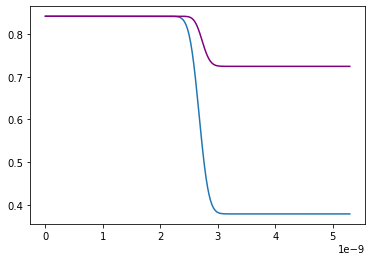

In [15]:
stark = [] 

for mi in range(m):
    stark.append(-np.trapz(pow(Control_tp[:mi, 0]/sol.gamma, 2), x=t[:mi]*sol.gamma)/(detuning/sol.gamma))

plt.plot(t, np.array(stark)+np.angle(sol.E[0, -1, 0]))
plt.plot(t, np.angle(sol.E[:, -1, 0]), color='purple')
plt.show()

## Retrieval efficiency vs control power

In [48]:
# Make atom class

config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

protocol = 'Raman'

BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning 
deltaC = detuning


L = 0.075

t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 1000
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.array(np.zeros((n, 1, 1, 1, 1, vno)))

OD = 5000


solW = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

control_pol = np.array([1, 0])
Control_store = S.gaussian(t, t0, tau, 2*np.pi*1e9)[:, None] * control_pol[None, :]

Control_tzp = solW.co_prop( Control_store )

solW.solve(Control_tzp, method='RK4-Ralston')

storage_eff = solW.storage_efficiency(solW.S, -1)
print("Storage efficiency = ", storage_eff)

Omega = 2*np.pi*1e9*0.933
Einits = np.zeros(m)[:, None] * photon_pol[None, :]
Sinits = solW.S[-1]

solR = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_ret = S.gaussian(t, t0, tau, Omega)[:, None] * control_pol[None, :]

Control_tzp = solR.co_prop( Control_ret )

solR.solve(Control_tzp, method='RK4-Ralston')

print("Retrieval efficiency = ",  solR.retrieval_efficiency(solR.E, 0, 0)/storage_eff )

Storage efficiency =  0.56499310634507
Retrieval efficiency =  0.5001416712123242


In [52]:
# Make atom class

config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

protocol = 'Raman'

BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning 
deltaC = detuning


L = 0.075

t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 1000
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.array(np.zeros((n, 1, 1, 1, 1, vno)))

OD = 5000


solW = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

control_pol = np.array([1, 0])
Control_store = S.gaussian(t, t0, tau, 2*np.pi*1e9)[:, None] * control_pol[None, :]

Control_tzp = solW.co_prop( Control_store )

solW.solve(Control_tzp, method='RK4-Ralston')

storage_eff = solW.storage_efficiency(solW.S, -1)
print("Storage efficiency = ", storage_eff)

m = 10000 #60000
t = np.linspace(0, tend, m)

Omega = 2*np.pi*1e9*50 # 2*np.pi*1e9*200
Einits = np.zeros(m)[:, None] * photon_pol[None, :]
Sinits = solW.S[-1]

solR = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_ret = S.gaussian(t, t0, tau, Omega)[:, None] * control_pol[None, :]

Control_tzp = solR.co_prop( Control_ret )

solR.solve(Control_tzp, method='RK4-Ralston')

print("Retrieval efficiency = ",  solR.retrieval_efficiency(solR.E, 0, 0)/storage_eff )

Storage efficiency =  0.56499310634507
Retrieval efficiency =  0.9771351850674402


In [3]:
# Make atom class

config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

protocol = 'Raman'

BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 273.15 + 80
vno = 30
detuning = 2*np.pi*6e9

deltaS = detuning 
deltaC = detuning


L = 0.075

t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 1000
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.array(np.zeros((n, 1, 1, 1, 1, vno)))

OD = 23000


solW = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

control_pol = np.array([1, 0])
Control_store = S.gaussian(t, t0, tau, 2*np.pi*1e9)[:, None] * control_pol[None, :]

Control_tzp = solW.co_prop( Control_store )

solW.solve(Control_tzp, method='RK4-Ralston')

storage_eff = solW.storage_efficiency(solW.S, -1)
print("Storage efficiency = ", storage_eff)

Omega = 2*np.pi*1e9*1.236
Einits = np.zeros(m)[:, None] * photon_pol[None, :]
Sinits = solW.S[-1]

solR = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_ret = S.gaussian(t, t0, tau, Omega)[:, None] * control_pol[None, :]

Control_tzp = solR.co_prop( Control_ret )

solR.solve(Control_tzp, method='RK4-Ralston')

print("Retrieval efficiency = ",  solR.retrieval_efficiency(solR.E, 0, 0)/storage_eff )

Storage efficiency =  0.8234372759426595
Retrieval efficiency =  0.5018936145876282


In [3]:
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

atom.reduced_dipoles

array([3.58387158e-29, 2.53417990e-29])

In [4]:
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

m = 1000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])
t = np.linspace(0, tend, m)

Omega = 2*np.pi*1e9*1.236
Control_ret = S.gaussian(t, t0, tau, Omega)

control_fudge_factor = 1/2

energy1_nJ = atom.control_pulse_to_energy(Control_ret/control_fudge_factor, t, 125e-6, 1) * 1e9
energy1_nJ

0.3615981765462853

In [73]:
# Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"n" : 5, "L": 2, "J" : 5/2}}}
atom = A.Rb87(config)

protocol = 'Raman'

BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 273.15 + 80
vno = 30
detuning = 2*np.pi*6e9

deltaS = detuning 
deltaC = detuning


L = 0.075

t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 1000
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.array(np.zeros((n, 1, 1, 1, 1, vno)))

OD = 23000


solW = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

control_pol = np.array([1, 0])
Control_store = S.gaussian(t, t0, tau, 2*np.pi*1e9)[:, None] * control_pol[None, :]

Control_tzp = solW.co_prop( Control_store )

solW.solve(Control_tzp, method='RK4-Ralston')

storage_eff = solW.storage_efficiency(solW.S, -1)
print("Storage efficiency = ", storage_eff)

m = 60000
t = np.linspace(0, tend, m)

Omega = 2*np.pi*1e9*150
Einits = np.zeros(m)[:, None] * photon_pol[None, :]
Sinits = solW.S[-1]

solR = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_ret = S.gaussian(t, t0, tau, Omega)[:, None] * control_pol[None, :]

Control_tzp = solR.co_prop( Control_ret )

solR.solve(Control_tzp, method='RK4-Ralston')

print("Retrieval efficiency = ",  solR.retrieval_efficiency(solR.E, 0, 0)/storage_eff )

Storage efficiency =  0.8204811115531302
Retrieval efficiency =  0.9694471368800572


In [10]:
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

m = 1000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])
t = np.linspace(0, tend, m)

Omega = 2*np.pi*1e9*150
Control_ret = S.gaussian(t, t0, tau, Omega)

control_fudge_factor = 1/2

energy2_nJ = atom.control_pulse_to_energy(Control_ret/control_fudge_factor, t, 125e-6, 1) * 1e9
energy2_nJ

5325.640030668025

In [11]:
energy2_nJ/energy1_nJ

14728.061080214913

In [24]:
# Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"n" : 5, "L": 2, "J" : 5/2}}}
atom = A.Rb87(config)

protocol = 'Raman'

BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 273.15 + 80
vno = 30
detuning = 2*np.pi*6e9

deltaS = detuning 
deltaC = detuning


L = 0.075

t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 1000
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.array(np.zeros((n, 1, 1, 1, 1, vno)))

OD = 23000


solW = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

control_pol = np.array([1, 0])
Control_store = S.gaussian(t, t0, tau, 2*np.pi*1e9)[:, None] * control_pol[None, :]

Control_tzp = solW.co_prop( Control_store )

solW.solve(Control_tzp, method='RK4-Ralston')

storage_eff = solW.storage_efficiency(solW.S, -1)
print("Storage efficiency = ", storage_eff)

m = 60000
t = np.linspace(0, tend, m)

Omega = 2*np.pi*1e9*130
Einits = np.zeros(m)[:, None] * photon_pol[None, :]
Sinits = solW.S[-1]

solR = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_ret = S.gaussian(t, t0, tau, Omega)[:, None] * control_pol[None, :]

Control_tzp = solR.co_prop( Control_ret )

solR.solve(Control_tzp, method='RK4-Ralston')

print("Retrieval efficiency = ",  solR.retrieval_efficiency(solR.E, 0, 0)/storage_eff )

Storage efficiency =  0.8204811115531307
Retrieval efficiency =  0.969460472158006


In [23]:
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"n" : 5, "L": 2, "J" : 5/2}}}
atom = A.Rb87(config)

m = 1000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])
t = np.linspace(0, tend, m)

Omega = 2*np.pi*1e9*130
Control_ret = S.gaussian(t, t0, tau, Omega)

control_fudge_factor = 1/2

energy3_nJ = atom.control_pulse_to_energy(Control_ret/control_fudge_factor, t, 125e-6, 1) * 1e9
energy3_nJ/energy1_nJ

100423.37675453915

In [11]:
# Make atom class

config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"n" : 5, "L": 2, "J" : 5/2}}}
atom = A.Rb87(config)

protocol = 'Raman'

BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning 
deltaC = detuning


L = 0.075

t0 = 3*tau
tend = 2*t0
tbounds = np.array([0, tend])

m = 1000
t = np.linspace(0, tend, m)

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :]

Sinits = np.array(np.zeros((n, 1, 1, 1, 1, vno)))

OD = 5000
Omega_list = 2*np.pi*1e9*np.linspace(0.1, 20, 50)

solW = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

control_pol = np.array([1, 0])
Control_store = S.gaussian(t, t0, tau, 2*np.pi*1e9)[:, None] * control_pol[None, :]

Control_tzp = solW.counter_prop( Control_store, zdef=0.5 )

solW.solve(Control_tzp, method='RK4-Ralston')

storage_eff = solW.storage_efficiency(solW.S, -1)
print(storage_eff)

retrieval_eff_list = []

for j, Omega in enumerate(Omega_list):
    Einits = np.zeros(m)[:, None] * photon_pol[None, :]
    Sinits = solW.S[-1]

    solR = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

    Control_ret = S.gaussian(t, t0, tau, Omega)[:, None] * control_pol[None, :]

    Control_tzp = solR.co_prop( Control_ret )

    solR.solve(Control_tzp, method='RK4-Ralston')

    retrieval_eff_list.append( solR.retrieval_efficiency(solR.E, 0, 0)/storage_eff )


plt.plot(Omega_list/(2*np.pi*1e9), retrieval_eff_list)
plt.show()

0.4889786546944683


In [ ]:
Omega_list/(2*np.pi*1e9)

array([ 0.1       ,  0.34285714,  0.58571429,  0.82857143,  1.07142857,
        1.31428571,  1.55714286,  1.8       ,  2.04285714,  2.28571429,
        2.52857143,  2.77142857,  3.01428571,  3.25714286,  3.5       ,
        3.74285714,  3.98571429,  4.22857143,  4.47142857,  4.71428571,
        4.95714286,  5.2       ,  5.44285714,  5.68571429,  5.92857143,
        6.17142857,  6.41428571,  6.65714286,  6.9       ,  7.14285714,
        7.38571429,  7.62857143,  7.87142857,  8.11428571,  8.35714286,
        8.6       ,  8.84285714,  9.08571429,  9.32857143,  9.57142857,
        9.81428571, 10.05714286, 10.3       , 10.54285714, 10.78571429,
       11.02857143, 11.27142857, 11.51428571, 11.75714286, 12.        ])

In [ ]:
retrieval_eff_list

[0.008584464050281147,
 0.09614349814476712,
 0.2537194579558622,
 0.4366834732692553,
 0.5998553495222735,
 0.7137791983748208,
 0.772555711389137,
 0.7907701087612603,
 0.7924525954440562,
 0.7983897836542472,
 0.8179345299921766,
 0.8482371488156889,
 0.879615427061199,
 0.9029395858823889,
 0.9147273271412723,
 0.9177840204945996,
 0.9181174960770874,
 0.9207676207910299,
 0.9272221161030041,
 0.9355754921663448,
 0.9427034174766588,
 0.9466597932756737,
 0.947747115125919,
 0.947867689138445,
 0.9489423079357888,
 0.95163256843995,
 0.9551646227314011,
 0.9581674090107132,
 0.9597680072414501,
 0.9601426369365114,
 0.9602316215350587,
 0.9609549723673471,
 0.9625618859426046,
 0.9645568599319909,
 0.9661715523879683,
 0.9669673950747957,
 0.9671176326887959,
 0.9672075763383315,
 0.9677592517611756,
 0.968859436219911,
 0.9701490751857793,
 0.9711397426065347,
 0.9715894502808685,
 0.9716569043560978,
 0.9717451075377372,
 0.9721811082818093,
 0.9729832739731067,
 0.97387835412542

# Optimisation

### Optimise storage for forward retrieval 

In [4]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 5000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 600
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2.5e8))[:, None] * control_pol[None, :]
Control_readout = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_readout]
step_size = 2000
tol = 0.01

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_storage, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=5000, total_eff=0.5789915359172978



In [7]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 4291.934260128778
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 600
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2.5e8))[:, None] * control_pol[None, :]
Control_readout = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_readout]
step_size = 500
tol = 0.01

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_storage, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=4291.934260128778, total_eff=0.5536884382622013



### Optimise storage and readout pulse for forward retrieval 

In [8]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 4291.934260128778
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 600
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2.5e8))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.01

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=5000, total_eff=0.5642552912834619



In [9]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 4291.934260128778
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 600
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2.5e9))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.01

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=4291.934260128778, total_eff=0.5655879970600597



In [10]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 2682.6957952797247
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 600
n = 50
T = 0
vno = 1
detuning = 2*np.pi*6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2.5e9))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.01

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=2682.6957952797247, total_eff=0.568017963107414



### Magic detuning

In [11]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 2947.0517025518097
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 800
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 4e10))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 4e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.001

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

KeyboardInterrupt: 

In [5]:
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
tau

4.412712003053032e-10

In [10]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 10000
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 800
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 4e10))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 4e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.001

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=10000, total_eff=0.8074763726399462



In [13]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 2947.0517025518097
# BW = 2*np.pi*1e9
tau = 1e-9 #2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 800
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2e10))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 2e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.01

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=2947.0517025518097, total_eff=0.5588134633538528



In [8]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 5179.474679231213
# BW = 2*np.pi*1e9
tau = 1e-9 #2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 800
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2.5e9))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.01

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=5179.474679231213, total_eff=0.5668369495727872



In [9]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 3237.457542817643
# BW = 2*np.pi*1e9
tau = 1e-9 #2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 800
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2.5e9))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.01

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=3237.457542817643, total_eff=0.559127463384393



In [5]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 596.36233166
BW = 2*np.pi*1e9
tau = 2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 1000
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 2.5e9))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.0001

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True, max_step_size=1e5)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

KeyboardInterrupt: 

### Magic detuning (10ns signal)

In [15]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 10000
#BW = 2*np.pi*1e9
tau = 10e-9 #2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 1000
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.001

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=10000, total_eff=0.7951631844887288



In [20]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 10000
#BW = 2*np.pi*1e9
tau = 10e-9 #2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 1000
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 5000
tol = 0.001

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=False)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=10000, total_eff=0.8135137744952334



In [17]:
### Make atom class
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 2}, "intermediate": {"n": 5, "J": 3/2}, 
                                                    "storage": {"L": 0, "F" : 1}}}
atom = A.Rb87(config)

### Make solver class
protocol = 'Raman'
OD = 10000
#BW = 2*np.pi*1e9
tau = 10e-9 #2*np.log(2)/(np.pi*(BW/(2*np.pi)))
m = 1000
n = 50
T = 0
vno = 1
detuning = 2*np.pi*18.6e9

deltaS = detuning #definition of detuning means that signal field and control field should be negative of each other
                    #for two photon resonance
deltaC = detuning

L = 0.075

t0 = 6*tau
tend = 2*t0
tbounds = np.array([0, tend])

t = np.linspace(0, tend, m) #this is also defined in solver but in natural units -> tidy up?

photon_pol = np.array([1, 0]) #should be normalised
Einits = np.array(S.photon_gaussian(t, t0, tau))[:, None] * photon_pol[None, :] 

control_pol = np.array([1, 0]) #should be normalised

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno))

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

### Make optimiser class
Control_init1 = (S.gaussian(t, t0, tau, 1.5e10))[:, None] * control_pol[None, :]
Control_init2 = (S.gaussian(t, t0, tau, 1.5e10))[:, None] * control_pol[None, :]
Controls = [Control_init1, Control_init2]
step_size = 500
tol = 0.001

opt = Opt.optimiser(sol, method='RK4-Ralston', _complex=True, verbose=False, live_plot=True)

eff, Control_opts, count = opt.Krotov(opt.forward_retrieval_opt_all, Controls, step_size, tol,
                                    adaptive_step_size=True)
print(f"OD={OD}, total_eff={eff}\n")


    'data': [{'mode': 'lines+markers',
              'name': 'Storage Efficiency…

OD=10000, total_eff=0.6528368779008733

